<a href="https://colab.research.google.com/github/ed-chin-git/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [95]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# set up some fake data similar to above chart
fake = pd.Series( [38,3,2,1,2,4,6,5,5,33] ,index=range(1,11) )

In [97]:
plt.style.available

['classic',
 'seaborn-poster',
 'seaborn-darkgrid',
 'Solarize_Light2',
 'dark_background',
 'seaborn-talk',
 'seaborn-pastel',
 '_classic_test',
 'seaborn-ticks',
 'seaborn-notebook',
 'seaborn',
 'bmh',
 'seaborn-deep',
 'seaborn-paper',
 'fast',
 'seaborn-muted',
 'grayscale',
 'seaborn-dark',
 'seaborn-white',
 'ggplot',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-bright']

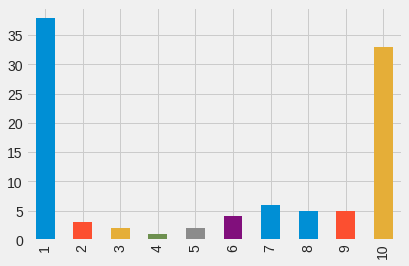

In [98]:
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-white')

fake.plot.bar();

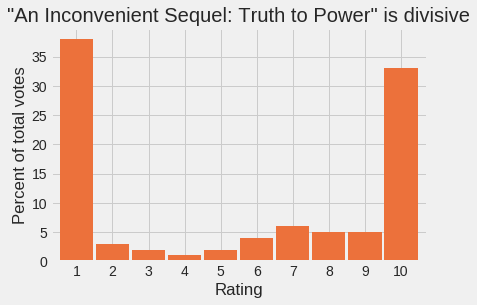

In [99]:
#  create an object handle for the chart
#  this will allow setting of Chart Obj parameters
ax = fake.plot.bar(color='#EC713B', width=0.92)

ax.tick_params(labelrotation=0) # rotate the x labels

#  define the title 
#ax.set_title('Xxx')
ax.set(title='"An Inconvenient Sequel: Truth to Power" is divisive', 
       xlabel='Rating', 
       ylabel='Percent of total votes');

In [100]:
display(example)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [136]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [137]:

#  don't skip any columns!!!
pd.options.display.max_columns=None
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [143]:
#  Vertically show  all columns/features of 1 row/instance
df.sample(1).T

,61913
timestamp,2017-08-23 08:10:02.950704
respondents,428
category,Aged 18-29
link,http://www.imdb.com/title/tt6322922/ratings-age_2
average,6.3
mean,6.5
median,8
1_votes,117
2_votes,3
3_votes,6


In [144]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-18 14:00:03.879499
freq                               1
Name: timestamp, dtype: object

In [0]:
#  timestamp not being treated as a datetime
#  convert timestamp data to datetime format
df.timestamp=pd.to_datetime(df.timestamp)

In [0]:
#  set the index to timestamp instead of count_integers
df.set_index('timestamp', inplace=True)

In [0]:
df

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80053 entries, 2017-07-17 12:28:32.785639 to 2017-08-29 23:10:06.218251
Data columns (total 26 columns):
respondents    80053 non-null int64
category       80053 non-null object
link           80053 non-null object
average        80053 non-null float64
mean           80053 non-null float64
median         80053 non-null int64
1_votes        80053 non-null int64
2_votes        80053 non-null int64
3_votes        80053 non-null int64
4_votes        80053 non-null int64
5_votes        80053 non-null int64
6_votes        80053 non-null int64
7_votes        80053 non-null int64
8_votes        80053 non-null int64
9_votes        80053 non-null int64
10_votes       80053 non-null int64
1_pct          80053 non-null float64
2_pct          80053 non-null float64
3_pct          80053 non-null float64
4_pct          80053 non-null float64
5_pct          80053 non-null float64
6_pct          80053 non-null float64
7_pct          80053 non-null fl

In [132]:
df.category.value_counts()

Females Aged 18-29    4216
Top 1000 voters       4216
Males                 4216
Non-US users          4216
Males Aged 18-29      4216
Females Aged 45+      4216
Females Aged 30-44    4216
Females               4216
Aged 45+              4216
IMDb users            4216
Males Aged 45+        4216
Males Aged 30-44      4216
IMDb staff            4216
Aged under 18         4216
US users              4216
Males under 18        4216
Aged 18-29            4216
Aged 30-44            4216
Females under 18      4165
Name: category, dtype: int64

In [142]:
# like a where clause in sql
#  booleaN INDEXING
#  filter out the falses; accept the trues
df[df.category=='IMDb users']

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
17,2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
35,2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
53,2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
71,2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
89,2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
107,2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
125,2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
143,2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
161,2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
179,2017-07-17 20:00:05.841494,681,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,307,14,8,5,9,10,18,24,30,256,45.1,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


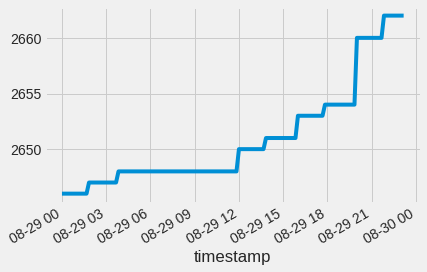

In [153]:
lastday=df['2017-08-29']
lastday[lastday.category=='IMDb users'].respondents.plot()

In [156]:
# the last timestamp/ row/ 
df.tail(1)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final =df.tail(1)

In [0]:
columns=['1_pct', '2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct',]
data = final[columns].T


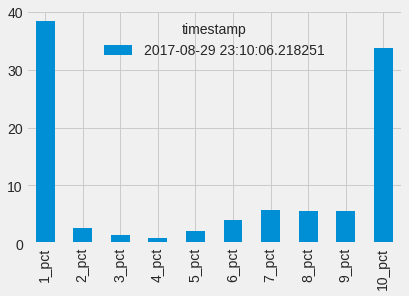

In [161]:
data.plot.bar()